# IPL Win Probability Prediction

## Overview :
             * The data has the teams and results of each IPL season (2008 - 2019) 
             * It also consists of score in each over and all the details regarding player
             * By this data we can predict the probability of teams in IPL
          

### source : https://www.kaggle.com/datasets/ramjidoolla/ipl-data-set    

### key steps :
           1. Reading data and data visualization
           2. Removing or replacing NULL data
           3. Replacing catagorial data
           4. spliting into test and train data
           5. Apply suatable Algorithams
           6. Preding the data
           

# Importing libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
match    = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

# EDA and Data visualization
    
     * Analysing data
     * ploting graphs using different methods
     * Realation between dependent and Independent data

In [3]:
# By this match dataset we can get overview of every match
match.head() 

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
match.shape

(756, 18)

In [5]:
# By this dataset we can see evey single information
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
# Requed information
Req_info = [
    'bating_team',  
    'bowling_team',
    'City',
    'runs_left',
    'balls_left',
    'wickets_left',
    'total_runs_x',
    'crr',
    'rrr'
    'Resluts'
]

In [7]:
# creating new dataframe and exploting some information
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [8]:
# gathering total_runs in 1st innings 
total_score_df = total_score_df[total_score_df["inning"]==1]
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [9]:
# Merging total_score_df to the match dataframe

match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on="total_runs")

In [10]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,56,IPL-2017,Mumbai,16-05-2017,Rising Pune Supergiant,Mumbai Indians,Mumbai Indians,field,normal,0,Rising Pune Supergiant,20,0,Washington Sundar,Wankhede Stadium,S Ravi,C Shamshuddin,NaN,301,56
1,65,IPL-2008,Jaipur,21-04-2008,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,6,SR Watson,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN,11340,65
2,67,IPL-2008,Chennai,23-04-2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN,35,67
3,67,IPL-2008,Chennai,23-04-2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN,99,67
4,70,IPL-2008,Bangalore,26-04-2008,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,SR Watson,M Chinnaswamy Stadium,MR Benson,IL Howell,NaN,471,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,241,IPL-2011,Jaipur,12-04-2011,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Rajasthan Royals,0,6,SK Warne,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN,11338,241
752,246,IPL-2011,Jaipur,15-04-2011,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,9,G Gambhir,Sawai Mansingh Stadium,Aleem Dar,SS Hazare,NaN,206,246
753,248,IPL-2011,Chennai,16-04-2011,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,21,0,MEK Hussey,"MA Chidambaram Stadium, Chepauk",HDPK Dharmasena,AL Hill,NaN,620,248
754,250,IPL-2011,Mumbai,17-04-2011,Pune Warriors,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,3,Yuvraj Singh,Dr DY Patil Sports Academy,Asad Rauf,AM Saheba,NaN,7937,250


In [11]:
# what are the teams involved in IPL
match_df['team1'].unique()

array(['Rising Pune Supergiant', 'Kings XI Punjab', 'Chennai Super Kings',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Deccan Chargers', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Pune Warriors'], dtype=object)

In [12]:
# Teams that are continuing till now
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [13]:
# Replacing duplicte data and deleting quited teams
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')


In [14]:
match_df.shape

(756, 20)

In [15]:
match_df = match_df[match_df['dl_applied'] == 0]

In [16]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [17]:

delivery_df = match_df.merge(delivery,on='match_id')

In [18]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [19]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
94,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,1,SV Samson,...,0,0,0,0,0,0,0,NaN,NaN,NaN
95,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,2,SV Samson,...,0,0,0,0,6,0,6,NaN,NaN,NaN
96,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,3,SV Samson,...,0,0,0,0,4,0,4,NaN,NaN,NaN
97,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,4,SV Samson,...,0,0,0,0,0,0,0,NaN,NaN,NaN
98,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,5,SV Samson,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175727,411,Delhi,Royal Challengers Bangalore,263,2,Pune Warriors,Royal Challengers Bangalore,20,2,AG Murtaza,...,0,0,0,0,4,0,4,NaN,NaN,NaN
175728,411,Delhi,Royal Challengers Bangalore,263,2,Pune Warriors,Royal Challengers Bangalore,20,3,AG Murtaza,...,0,0,0,0,0,0,0,AG Murtaza,stumped,KB Arun Karthik
175729,411,Delhi,Royal Challengers Bangalore,263,2,Pune Warriors,Royal Challengers Bangalore,20,4,IC Pandey,...,0,0,0,0,0,0,0,NaN,NaN,NaN
175730,411,Delhi,Royal Challengers Bangalore,263,2,Pune Warriors,Royal Challengers Bangalore,20,5,IC Pandey,...,0,0,0,0,0,0,0,IC Pandey,bowled,NaN


In [20]:
# This calcultes the current score of the batting team

delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']


In [21]:
delivery_df['runs_left'] = delivery_df['total_runs_x']- delivery_df['current_score']


In [22]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])


In [23]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
94,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,1,SV Samson,...,0,0,0,0,NaN,NaN,NaN,0,65,119
95,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,2,SV Samson,...,0,6,0,6,NaN,NaN,NaN,6,59,118
96,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,3,SV Samson,...,0,4,0,4,NaN,NaN,NaN,10,55,117
97,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,4,SV Samson,...,0,0,0,0,NaN,NaN,NaN,10,55,116
98,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,5,SV Samson,...,0,0,0,0,NaN,NaN,NaN,10,55,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175727,411,Delhi,Royal Challengers Bangalore,263,2,Pune Warriors,Royal Challengers Bangalore,20,2,AG Murtaza,...,0,4,0,4,NaN,NaN,NaN,132,131,4
175728,411,Delhi,Royal Challengers Bangalore,263,2,Pune Warriors,Royal Challengers Bangalore,20,3,AG Murtaza,...,0,0,0,0,AG Murtaza,stumped,KB Arun Karthik,132,131,3
175729,411,Delhi,Royal Challengers Bangalore,263,2,Pune Warriors,Royal Challengers Bangalore,20,4,IC Pandey,...,0,0,0,0,NaN,NaN,NaN,132,131,2
175730,411,Delhi,Royal Challengers Bangalore,263,2,Pune Warriors,Royal Challengers Bangalore,20,5,IC Pandey,...,0,0,0,0,IC Pandey,bowled,NaN,132,131,1


In [24]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
94,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,1,SV Samson,...,0,0,0,0,NaN,NaN,0,65,119,10
95,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,2,SV Samson,...,6,0,6,0,NaN,NaN,6,59,118,10
96,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,3,SV Samson,...,4,0,4,0,NaN,NaN,10,55,117,10
97,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,4,SV Samson,...,0,0,0,0,NaN,NaN,10,55,116,10
98,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,5,SV Samson,...,0,0,0,0,NaN,NaN,10,55,115,10


In [25]:

delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
94,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,1,SV Samson,...,0,0,0,0,NaN,NaN,0,65,119,10
95,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,2,SV Samson,...,6,0,6,0,NaN,NaN,6,59,118,10
96,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,3,SV Samson,...,4,0,4,0,NaN,NaN,10,55,117,10
97,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,4,SV Samson,...,0,0,0,0,NaN,NaN,10,55,116,10
98,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,5,SV Samson,...,0,0,0,0,NaN,NaN,10,55,115,10


In [26]:
# current run rate = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])


In [27]:
# resulted run rate = 
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']


In [28]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
94,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,1,SV Samson,...,0,0,NaN,NaN,0,65,119,10,0.000000,3.277311
95,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,2,SV Samson,...,6,0,NaN,NaN,6,59,118,10,18.000000,3.000000
96,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,3,SV Samson,...,4,0,NaN,NaN,10,55,117,10,20.000000,2.820513
97,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,4,SV Samson,...,0,0,NaN,NaN,10,55,116,10,15.000000,2.844828
98,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,5,SV Samson,...,0,0,NaN,NaN,10,55,115,10,12.000000,2.869565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175727,411,Delhi,Royal Challengers Bangalore,263,2,Pune Warriors,Royal Challengers Bangalore,20,2,AG Murtaza,...,4,0,NaN,NaN,132,131,4,3,6.827586,196.500000
175728,411,Delhi,Royal Challengers Bangalore,263,2,Pune Warriors,Royal Challengers Bangalore,20,3,AG Murtaza,...,0,1,stumped,KB Arun Karthik,132,131,3,2,6.769231,262.000000
175729,411,Delhi,Royal Challengers Bangalore,263,2,Pune Warriors,Royal Challengers Bangalore,20,4,IC Pandey,...,0,0,NaN,NaN,132,131,2,2,6.711864,393.000000
175730,411,Delhi,Royal Challengers Bangalore,263,2,Pune Warriors,Royal Challengers Bangalore,20,5,IC Pandey,...,0,1,bowled,NaN,132,131,1,1,6.655462,786.000000


In [30]:

def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0


In [31]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [32]:
delivery_df


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
94,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,1,SV Samson,...,0,NaN,NaN,0,65,119,10,0.000000,3.277311,1
95,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,2,SV Samson,...,0,NaN,NaN,6,59,118,10,18.000000,3.000000,1
96,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,3,SV Samson,...,0,NaN,NaN,10,55,117,10,20.000000,2.820513,1
97,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,4,SV Samson,...,0,NaN,NaN,10,55,116,10,15.000000,2.844828,1
98,11340,Jaipur,Rajasthan Royals,65,2,Rajasthan Royals,Royal Challengers Bangalore,1,5,SV Samson,...,0,NaN,NaN,10,55,115,10,12.000000,2.869565,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175727,411,Delhi,Royal Challengers Bangalore,263,2,Pune Warriors,Royal Challengers Bangalore,20,2,AG Murtaza,...,0,NaN,NaN,132,131,4,3,6.827586,196.500000,0
175728,411,Delhi,Royal Challengers Bangalore,263,2,Pune Warriors,Royal Challengers Bangalore,20,3,AG Murtaza,...,1,stumped,KB Arun Karthik,132,131,3,2,6.769231,262.000000,0
175729,411,Delhi,Royal Challengers Bangalore,263,2,Pune Warriors,Royal Challengers Bangalore,20,4,IC Pandey,...,0,NaN,NaN,132,131,2,2,6.711864,393.000000,0
175730,411,Delhi,Royal Challengers Bangalore,263,2,Pune Warriors,Royal Challengers Bangalore,20,5,IC Pandey,...,1,bowled,NaN,132,131,1,1,6.655462,786.000000,0


In [33]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]



# Final dataset

In [34]:

final_df = final_df.sample(final_df.shape[0])


In [35]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
126836,Rajasthan Royals,Chennai Super Kings,Kolkata,157,96,7,182,6.25,9.8125,0


In [37]:
final_df.dropna(inplace=True)

In [38]:
final_df = final_df[final_df['balls_left'] != 0]

# Train Test Split

In [39]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)


In [42]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
164168,Mumbai Indians,Chennai Super Kings,Kolkata,134,67,8,208,8.377358,12.000000
72439,Mumbai Indians,Rising Pune Supergiants,Durban,68,51,9,159,7.913043,8.000000
111287,Delhi Capitals,Mumbai Indians,Johannesburg,96,36,5,174,5.571429,16.000000
47395,Chennai Super Kings,Mumbai Indians,Centurion,97,67,8,147,5.660377,8.686567
171899,Sunrisers Hyderabad,Royal Challengers Bangalore,Kolkata,205,107,10,227,10.153846,11.495327
...,...,...,...,...,...,...,...,...,...
37462,Kolkata Knight Riders,Mumbai Indians,Johannesburg,96,83,10,141,7.297297,6.939759
135184,Kolkata Knight Riders,Royal Challengers Bangalore,Delhi,113,71,9,185,8.816327,9.549296
12197,Pune Warriors,Sunrisers Hyderabad,Cape Town,58,63,7,119,6.421053,5.523810
30901,Deccan Chargers,Chennai Super Kings,East London,38,31,7,138,6.741573,7.354839


# Catagorial data

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

# importing Requied classification Algorithms

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [45]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [46]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [47]:
y_pred = pipe.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8881715334952319

In [53]:
pipe.predict_proba(X_test)[10]

array([0.7808091, 0.2191909])

In [54]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [56]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [64]:
temp_df,target = match_progression(delivery_df,69,pipe)
temp_df

Target- 182


,end_of_over,runs_after_over,wickets_in_over,lose,win
125583,1,2,0,93.9,6.1
125589,2,12,0,95.0,5.0
125596,3,4,2,95.7,4.3
125602,4,3,0,95.2,4.8
125609,5,13,0,95.5,4.5
125615,6,5,0,95.2,4.8
125621,7,6,0,94.9,5.1
125628,8,15,0,95.2,4.8
125635,9,5,1,95.4,4.6
125641,10,2,1,95.5,4.5


# Plotting the win rate and no_of_overs and wickets_left

Text(0.5, 1.0, 'Target-182')

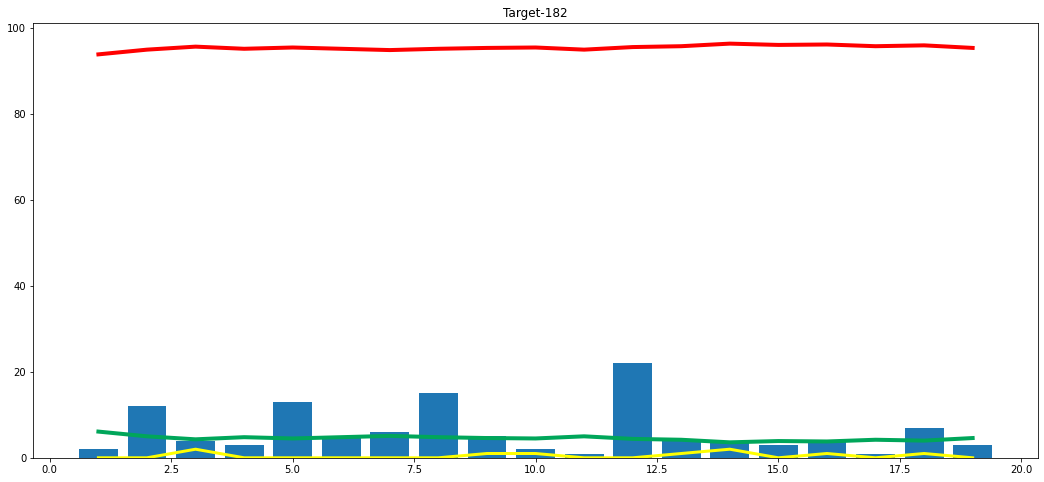

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [66]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [67]:
delivery_df['city'].unique()

array(['Jaipur', 'Chennai', 'Bangalore', 'Chandigarh', 'Hyderabad',
       'Mumbai', 'Kolkata', 'Delhi', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur'], dtype=object)

In [68]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

# Conclusion :

__The dataset contained 9 features and 1 target variable for binary classification which determines if team will win or not.__
__With the given match and delivery data, we implemented Exploratory Data Analysis, Visualized the data, Machine Learning models__
__and evaluated the model. After pre-processsing the data, then applied various classification algorithms on the data__
__which made it clear that Random Forest Classifier Model performed excellent with high accuracy (88%) compared to other algorithms.__